# Capstone Project - Housing Price Indicator (Week 2)

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)

In [1]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
from matplotlib.ticker import NullFormatter
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
%matplotlib inline
%matplotlib inline

## Introduction

For a lot of people, buying a house is a tremendous investment and a big step of moving forward in life. However, with no resources or personnal to help, the process of picking one that is right for you could be a daunting task, this project aim to build a accurate model, to showcase factor that may or may not have impact on hoursing prices. 

Using data listed below, a housing dataset in the US, this dataset has different data regarding attribute regarding to the building such as view, floors, condition, year build and year renovated etc.. Giving us a foundation to build our model.

For more information on the metadaya <a href="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv">Here</a>

In [2]:
df = pd.read_csv("kc_house_data_NaN.csv")

In [3]:
df.head(5)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.shape

(21613, 22)

In [5]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Data Cleaning

In [7]:
Q2 = df.drop(["id","Unnamed: 0"], axis=1)
Q2.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Dropping the first Unnamed: 0 coloum

In [8]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

Repleace empty value in some column

# Methodology 

### Exploratory Data

<AxesSubplot:xlabel='yr_built', ylabel='price'>

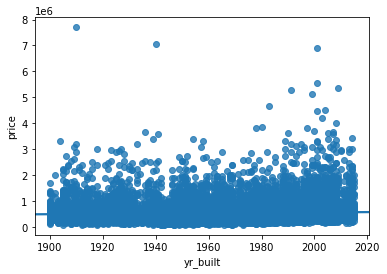

In [9]:
sns.regplot(x="yr_built",y="price",data=df)

it would seem there are no relation between Building Year and Price. Let's move on to the next 

In [10]:
df[["yr_built", "price"]].corr()

,yr_built,price
yr_built,1.000000,0.054012
price,0.054012,1.000000


<AxesSubplot:xlabel='condition', ylabel='price'>

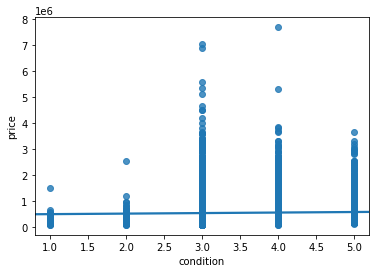

In [11]:
sns.regplot(x="condition",y="price",data=df)

In [12]:
df[["condition", "price"]].corr()

,condition,price
condition,1.000000,0.036362
price,0.036362,1.000000


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

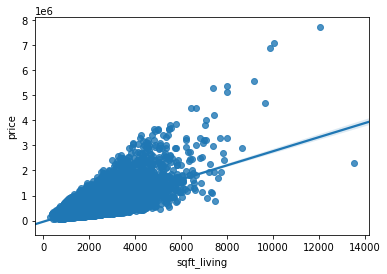

In [13]:
sns.regplot(x="sqft_living",y="price",data=df)

In [14]:
df[["sqft_living", "price"]].corr()

,sqft_living,price
sqft_living,1.000000,0.702035
price,0.702035,1.000000


<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

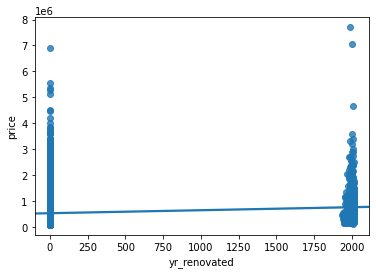

In [15]:
sns.regplot(x="yr_renovated",y="price",data=df)

In [16]:
df[["yr_renovated", "price"]].corr()

,yr_renovated,price
yr_renovated,1.000000,0.126434
price,0.126434,1.000000


<AxesSubplot:xlabel='floors', ylabel='price'>

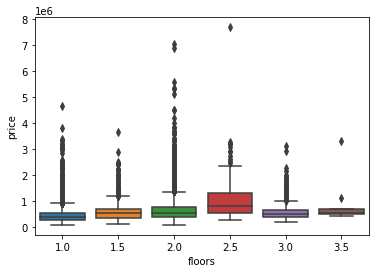

In [17]:
sns.boxplot(x="floors",y="price",data=df)

In [18]:
df[["floors", "price"]].corr()

,floors,price
floors,1.000000,0.256794
price,0.256794,1.000000


In [19]:
pricecorr = df.corr()['price'].sort_values()
pricecorr

zipcode         -0.053203
id              -0.016762
long             0.021626
Unnamed: 0       0.027372
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

Text(0.5, 1.0, 'Price correlation')

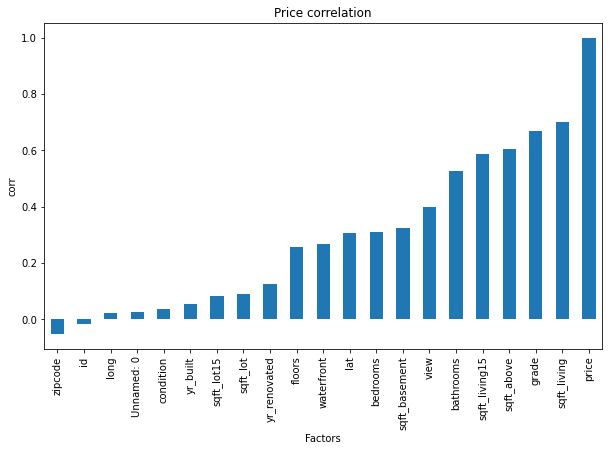

In [20]:
pricecorr.plot(kind='bar', figsize=(10, 6), rot=90) 

plt.xlabel('Factors')
plt.ylabel('corr')
plt.title('Price correlation')

After we put Every factors, we can see building size(living and upper floor) and grade are three top factors

In [21]:
Feature = df[['sqft_lot','yr_renovated','floors','waterfront','sqft_living15']]

In [22]:
X = Feature
X[0:5]

,sqft_lot,yr_renovated,floors,waterfront,sqft_living15
0,5650,0,1.0,0,1340
1,7242,1991,2.0,0,1690
2,10000,0,1.0,0,2720
3,5000,0,1.0,0,1360
4,8080,0,1.0,0,1800


In [23]:
y = df['price'].values
y[0:5]

array([221900., 538000., 180000., 604000., 510000.])

In [24]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[-0.22832133, -0.21012839, -0.915427  , -0.08717263, -0.9433552 ],
       [-0.18988538,  4.7466776 ,  0.93650577, -0.08717263, -0.43268619],
       [-0.12329847, -0.21012839, -0.915427  , -0.08717263,  1.07013975],
       [-0.2440144 , -0.21012839, -0.915427  , -0.08717263, -0.91417411],
       [-0.16965339, -0.21012839, -0.915427  , -0.08717263, -0.27219022]])

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (17290, 5) (17290,)
Test set: (4323, 5) (4323,)


In [26]:
AA = 4
neigh = KNeighborsClassifier(n_neighbors = AA).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [27]:
from sklearn import metrics
yhat = neigh.predict(X_test)
yhat[0:5]
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.25303643724696356
Test set Accuracy:  0.0034698126301179735


In [28]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.00323849, 0.00416378, 0.00416378, 0.00346981, 0.00346981,
       0.00346981, 0.00346981, 0.00393245, 0.0043951 ])

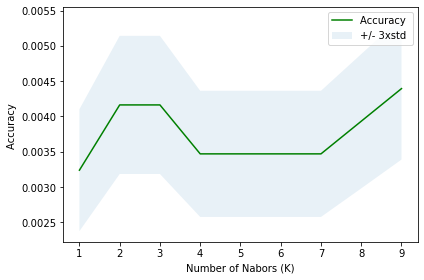

In [29]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

# Discussion 

From this report, we explored the data available in this data set and identified buildings' price and other attributes, it may come as a contradiction, however, we found that there are little relation between price and the amount of floors the building has. Building size(living and upper floor) and grade of the build, this three factores have the highest correlation with price. We also used K-Nearest Neighbors to attempt in clusting. 